H1N1 Vaccine dataset[classification problem]


In [ ]:
###  Importing all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [ ]:
#Load the dataset
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [ ]:
df.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
3418,3418,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,3.0,4.0,1.0,65+ Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
5037,5037,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,4.0,1.0,1.0,65+ Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,1.0,0.0,0
6301,6301,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Principle City",1.0,1.0,0
7945,7945,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,3.0,1.0,5.0,3.0,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,1
14850,14850,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,0.0,0.0,0.0,1.0,3.0,3.0,2.0,4.0,4.0,1.0,35 - 44 Years,Some College,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,1
3606,3606,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,5.0,2.0,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,1
18442,18442,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,4.0,5.0,5.0,5.0,1.0,18 - 34 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,1.0,1
4432,4432,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,2.0,2.0,4.0,18 - 34 Years,College Graduate,White,Male,NaN,Not Married,Rent,Employed,"MSA, Not Principle City",3.0,0.0,0
12891,12891,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,4.0,1.0,2.0,5.0,4.0,1.0,55 - 64 Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,1.0,0.0,1
12243,12243,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,2.0,1.0,5.0,5.0,5.0,45 - 54 Years,12 Years,Black,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",0.0,0.0,0


In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
df.describe(include='all')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [ ]:
df.shape

(26707, 34)

<Axes: xlabel='h1n1_worry'>

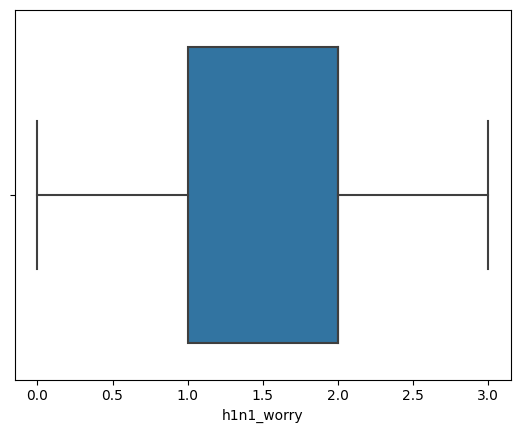

In [ ]:
sns.boxplot(x=df['h1n1_worry'])

<Axes: xlabel='h1n1_vaccine'>

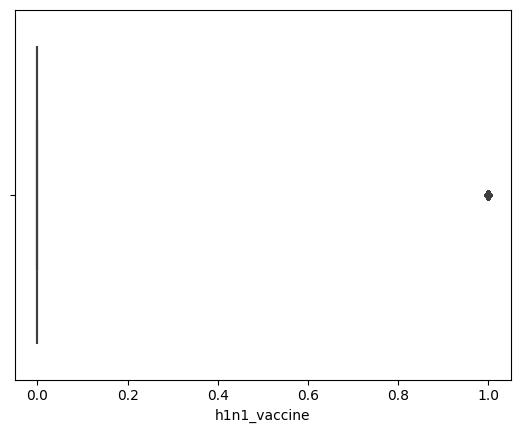

In [ ]:
sns.boxplot(x=df['h1n1_vaccine'])

In [ ]:
corr=df.corr()
corr

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,-0.002072,0.001500,0.005797,-0.004839,-0.003149,-0.012603,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.003280
h1n1_worry,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,0.150206,0.135567,0.095162,0.049574,0.033562,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929
h1n1_awareness,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,0.093829,0.071920,-0.022602,0.021598,0.170252,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951
antiviral_medication,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,0.030909,0.008465,0.028788,0.009465,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608
contact_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,0.074088,0.039435,-0.000414,0.001180,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690
bought_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,0.069481,0.068113,0.039726,0.069992,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498
wash_hands_frequently,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,0.102044,0.030260,0.036188,0.053761,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712
avoid_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,0.093557,0.104721,0.021168,-0.032319,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822
reduced_outside_home_cont,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,0.085622,0.098858,0.018195,-0.034619,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768
avoid_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,0.100808,0.028876,0.026640,0.067648,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648


<Axes: >

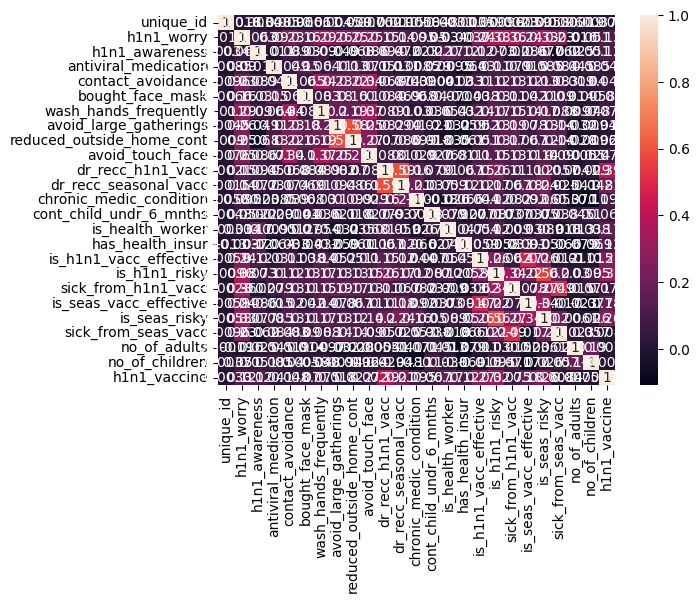

In [ ]:
sns.heatmap(corr,annot=True)

array([[<Axes: title={'center': 'unique_id'}>,
        <Axes: title={'center': 'h1n1_worry'}>,
        <Axes: title={'center': 'h1n1_awareness'}>,
        <Axes: title={'center': 'antiviral_medication'}>,
        <Axes: title={'center': 'contact_avoidance'}>],
       [<Axes: title={'center': 'bought_face_mask'}>,
        <Axes: title={'center': 'wash_hands_frequently'}>,
        <Axes: title={'center': 'avoid_large_gatherings'}>,
        <Axes: title={'center': 'reduced_outside_home_cont'}>,
        <Axes: title={'center': 'avoid_touch_face'}>],
       [<Axes: title={'center': 'dr_recc_h1n1_vacc'}>,
        <Axes: title={'center': 'dr_recc_seasonal_vacc'}>,
        <Axes: title={'center': 'chronic_medic_condition'}>,
        <Axes: title={'center': 'cont_child_undr_6_mnths'}>,
        <Axes: title={'center': 'is_health_worker'}>],
       [<Axes: title={'center': 'has_health_insur'}>,
        <Axes: title={'center': 'is_h1n1_vacc_effective'}>,
        <Axes: title={'center': 'is_h1n1_ri

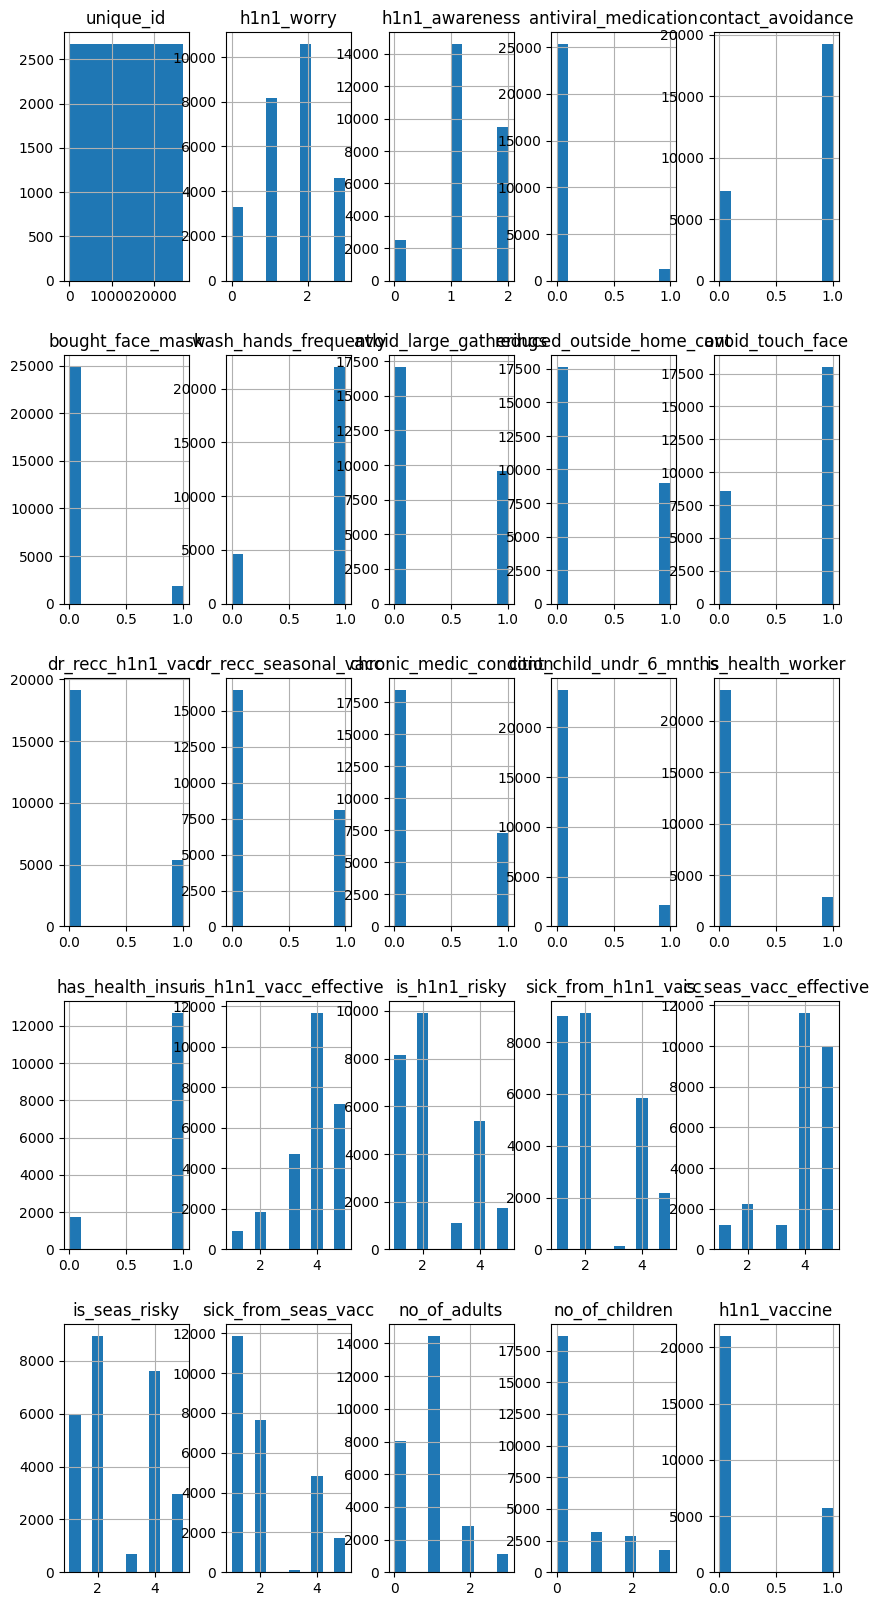

In [ ]:
df.hist(figsize=(10,20))

In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
###Dropping 
df.drop('race',axis=1,inplace=True)


In [ ]:
df.drop('no_of_children',axis=1,inplace=True)


In [ ]:
df.drop('no_of_adults',axis=1,inplace=True)

In [ ]:
df.drop('census_msa',axis=1,inplace=True)

In [ ]:
df.drop('housing_status',axis=1,inplace=True) 

In [ ]:
df.drop('income_level',axis=1,inplace=True) 

In [ ]:
df.drop('has_health_insur',axis=1,inplace=True) 

In [ ]:
df.drop('age_bracket',axis=1,inplace=True) 

In [ ]:
df.drop('employment',axis=1,inplace=True) 

In [ ]:
df.drop('qualification',axis=1,inplace=True) 

In [ ]:
df.drop('cont_child_undr_6_mnths',axis=1,inplace=True) 

In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
sex                           object
marital_status                object
h1n1_vaccine                   int64
dtype: object

In [ ]:
df.sample()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,sex,marital_status,h1n1_vaccine
14977,14977,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,5.0,1.0,5.0,5.0,1.0,Male,Not Married,1


In [ ]:
df.isnull().sum()

unique_id                       0
h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
sex                             0
marital_status               1408
h1n1_vaccine                    0
dtype: int64

In [ ]:
#Dealing with missing values
median1=df['sick_from_seas_vacc'].median()

In [ ]:
df['sick_from_seas_vacc'].replace(np.NaN,median1,inplace=True)

In [ ]:
median2=df['is_seas_risky'].median()

In [ ]:
df['is_seas_risky'].replace(np.NaN,median1,inplace=True)

In [ ]:
median3=df['is_seas_vacc_effective'].median()

In [ ]:
df['is_seas_vacc_effective'].replace(np.NaN,median1,inplace=True)

In [ ]:
median4=df['sick_from_h1n1_vacc'].median()

In [ ]:
df['sick_from_h1n1_vacc'].replace(np.NaN,median1,inplace=True)

In [ ]:
median5=df['is_h1n1_risky'].median()

In [ ]:
df['is_h1n1_risky'].replace(np.NaN,median1,inplace=True)

In [ ]:
median6=df['is_h1n1_vacc_effective'].median()

In [ ]:
df['is_h1n1_vacc_effective'].replace(np.NaN,median1,inplace=True)

In [ ]:
median7=df['is_health_worker'].median()

In [ ]:
df['is_health_worker'].replace(np.NaN,median1,inplace=True)

In [ ]:
median7=df['chronic_medic_condition'].median()

In [ ]:
df['chronic_medic_condition'].replace(np.NaN,median1,inplace=True)

In [ ]:
median8=df['dr_recc_seasonal_vacc'].median()

In [ ]:
df['dr_recc_seasonal_vacc'].replace(np.NaN,median1,inplace=True)

In [ ]:
median9=df['dr_recc_h1n1_vacc'].median()

In [ ]:
df['dr_recc_h1n1_vacc'].replace(np.NaN,median1,inplace=True)

In [ ]:
median10=df['avoid_touch_face'].median()

In [ ]:
df['avoid_touch_face'].replace(np.NaN,median1,inplace=True)

In [ ]:
median11=df['reduced_outside_home_cont'].median()

In [ ]:
df['reduced_outside_home_cont'].replace(np.NaN,median1,inplace=True)

In [ ]:
median12=df['contact_avoidance'].median()

In [ ]:
df['contact_avoidance'].replace(np.NaN,median1,inplace=True)

In [ ]:
median13=df['antiviral_medication'].median()

In [ ]:
df['antiviral_medication'].replace(np.NaN,median1,inplace=True)

In [ ]:
median14=df['h1n1_worry'].median()

In [ ]:
df['h1n1_worry'].replace(np.NaN,median1,inplace=True)

In [ ]:
median15=df['h1n1_awareness'].median()

In [ ]:
df['h1n1_awareness'].replace(np.NaN,median1,inplace=True)

In [ ]:
median16=df['avoid_large_gatherings'].median()

In [ ]:
df['avoid_large_gatherings'].replace(np.NaN,median1,inplace=True)

In [ ]:
median17=df['wash_hands_frequently'].median()

In [ ]:
df['wash_hands_frequently'].replace(np.NaN,median1,inplace=True)

In [ ]:
median18=df['bought_face_mask'].median()

In [ ]:
df['bought_face_mask'].replace(np.NaN,median1,inplace=True)

In [ ]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
is_health_worker                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
sex                             0
marital_status               1408
h1n1_vaccine                    0
dtype: int64

In [ ]:
###Encoding
df=pd.get_dummies(df,columns=['marital_status','sex'])

In [ ]:
df.sample(4)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,h1n1_vaccine,marital_status_Married,marital_status_Not Married,sex_Female,sex_Male
16515,16515,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,2.0,2.0,4.0,4.0,1.0,0,0,1,1,0
8662,8662,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1,1,0
6744,6744,2.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,4.0,2.0,2.0,2.0,1,0,0,1,0
21686,21686,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,5.0,4.0,5.0,5.0,0,0,0,1,0


In [ ]:
df.dtypes

unique_id                       int64
h1n1_worry                    float64
h1n1_awareness                float64
antiviral_medication          float64
contact_avoidance             float64
bought_face_mask              float64
wash_hands_frequently         float64
avoid_large_gatherings        float64
reduced_outside_home_cont     float64
avoid_touch_face              float64
dr_recc_h1n1_vacc             float64
dr_recc_seasonal_vacc         float64
chronic_medic_condition       float64
is_health_worker              float64
is_h1n1_vacc_effective        float64
is_h1n1_risky                 float64
sick_from_h1n1_vacc           float64
is_seas_vacc_effective        float64
is_seas_risky                 float64
sick_from_seas_vacc           float64
h1n1_vaccine                    int64
marital_status_Married          uint8
marital_status_Not Married      uint8
sex_Female                      uint8
sex_Male                        uint8
dtype: object

In [ ]:
#Train  Test  Split
Y=df["h1n1_vaccine"]
X=df.drop(["h1n1_vaccine"],axis=1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
model1=LogisticRegression()

In [ ]:
model1.fit(X_train,Y_train)

NameError: ignored

In [ ]:
model1.score(X_train,Y_train)

NameError: ignored

In [ ]:
model1.score(X_test,Y_test)

In [ ]:
###Making predictions
predictions=model1.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.7952077873455634

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6330
           1       0.53      0.22      0.31      1683

    accuracy                           0.80      8013
   macro avg       0.68      0.58      0.59      8013
weighted avg       0.76      0.80      0.76      8013



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions)

array([[6009,  321],
       [1320,  363]])

<Axes: >

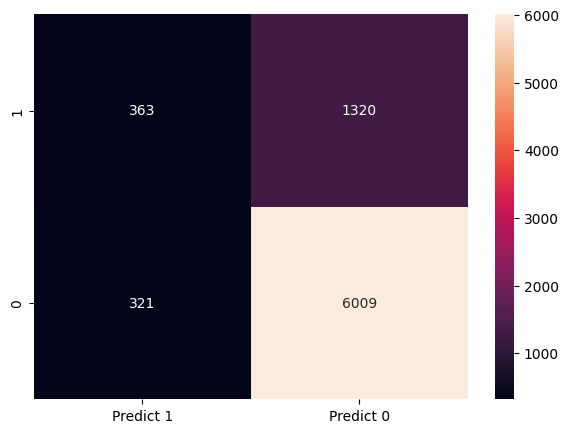

In [ ]:
cm=metrics.confusion_matrix(Y_test, predictions, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [ ]:
363+1320+321+6009

8013

In [ ]:
df.shape

(26707, 25)

In [ ]:
(26707*30)/100

8012.1

In [ ]:
(363+6009)/8012

0.7953070394408387

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(max_depth=3,min_samples_split=3,min_samples_leaf=0.3,criterion='entropy')
model3.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=0.3,
                       min_samples_split=3)

In [1]:

model3.score(X_train,Y_train)

NameError: ignored

In [ ]:
model3.score(X_test,Y_test)

0.7899663047547735

In [ ]:
from sklearn.ensemble import BaggingClassifier
model4=BaggingClassifier(n_estimators=50,max_samples=1.0)
model4.fit(X_train,Y_train)


BaggingClassifier(n_estimators=50)

In [ ]:
model4.score(X_train,Y_train)

0.9995185621054884

In [ ]:
model4.score(X_test,Y_test)

0.8296518157993261

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model5=AdaBoostClassifier()
model5.fit(X_train,Y_train)

AdaBoostClassifier()

In [ ]:
model5.score(X_train,Y_train)

0.8304803680325238

In [ ]:
model5.score(X_test,Y_test)

0.8397603893672781

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model6=GradientBoostingClassifier()
model6.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
model6.score(X_train,Y_train)

0.8393067294319033

In [ ]:
model6.score(X_test,Y_test)

0.8431299138899289

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model7=RandomForestClassifier()
model7.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
model7.score(X_train,Y_train)

1.0

In [ ]:
model7.score(X_test,Y_test)

0.8360164732309996

In [ ]:
from sklearn.svm import SVC
model8=SVC.fit